In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 1) Visualiser et étudier les données

In [2]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('cool') ##https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [3]:
dataset = pd.read_csv('dataset.csv')

In [4]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


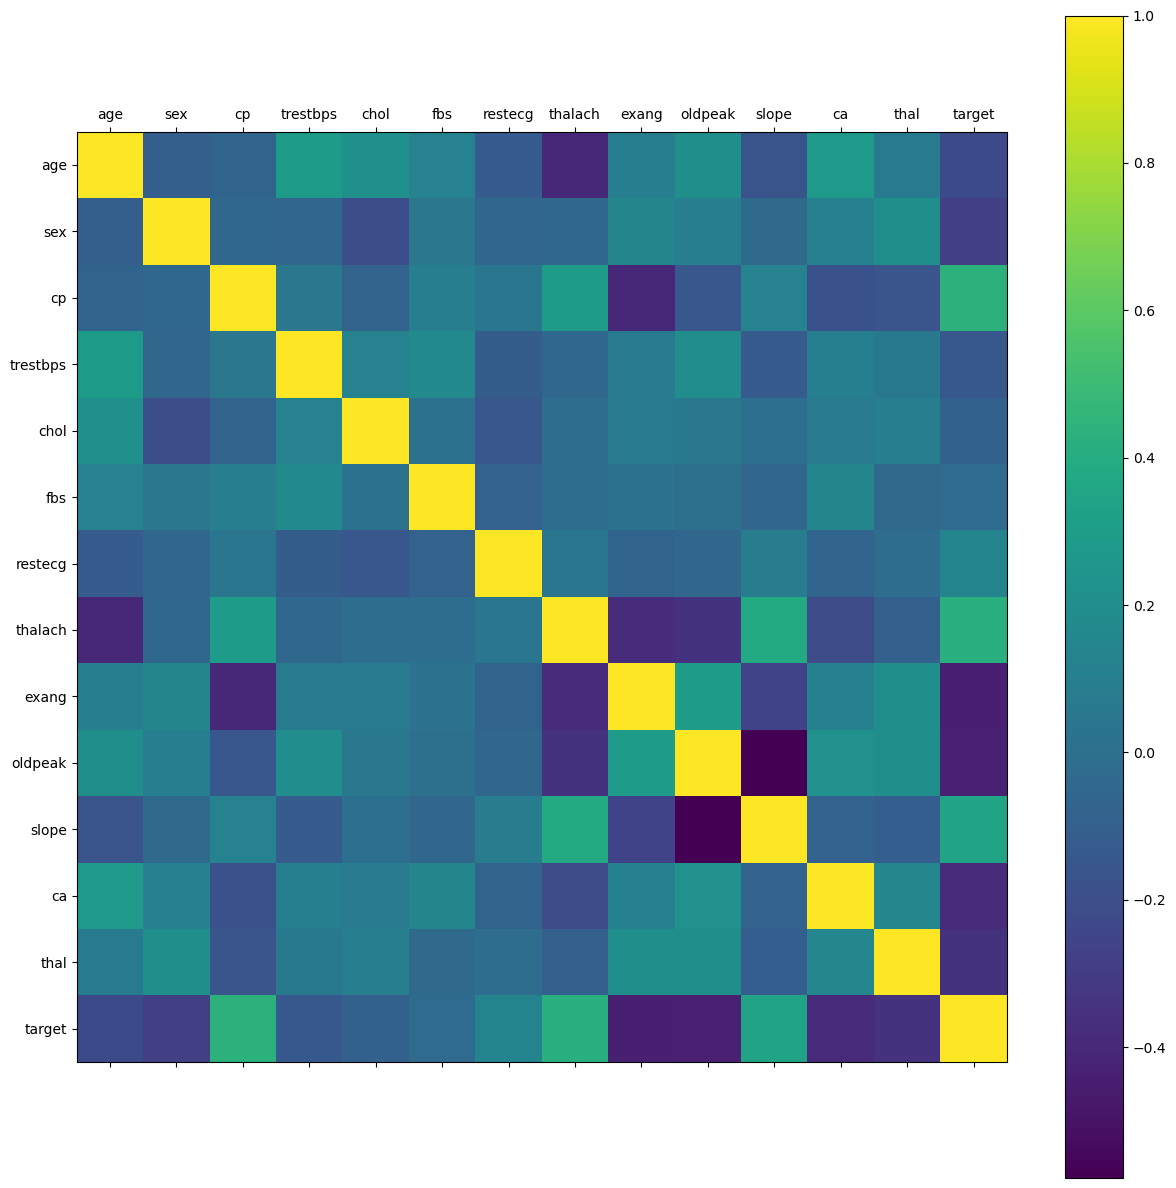

In [7]:
rcParams['figure.figsize'] = 10,15
rcParams["figure.dpi"]= 100
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

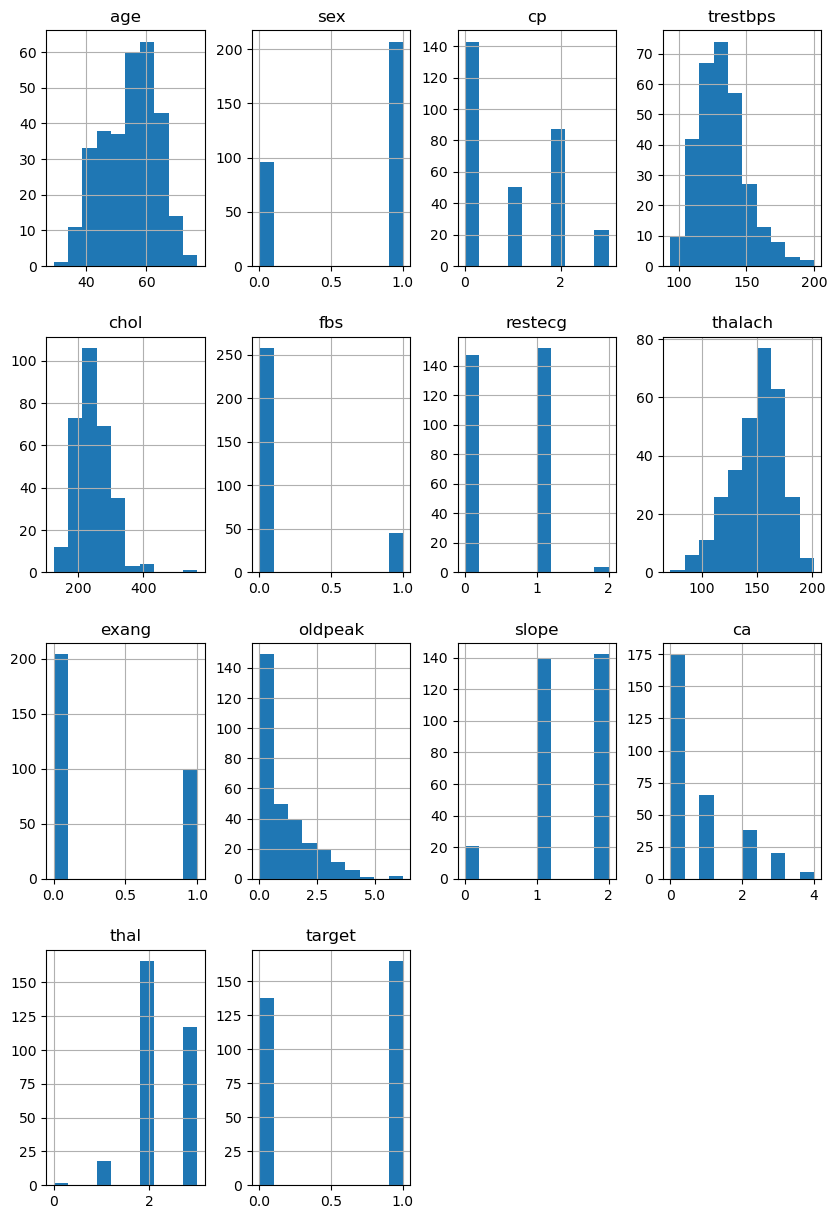

In [8]:
dataset.hist()

In [9]:
dataset['target'].unique()

array([1, 0], dtype=int64)

Text(0.5, 1.0, 'Count of each Target Class')

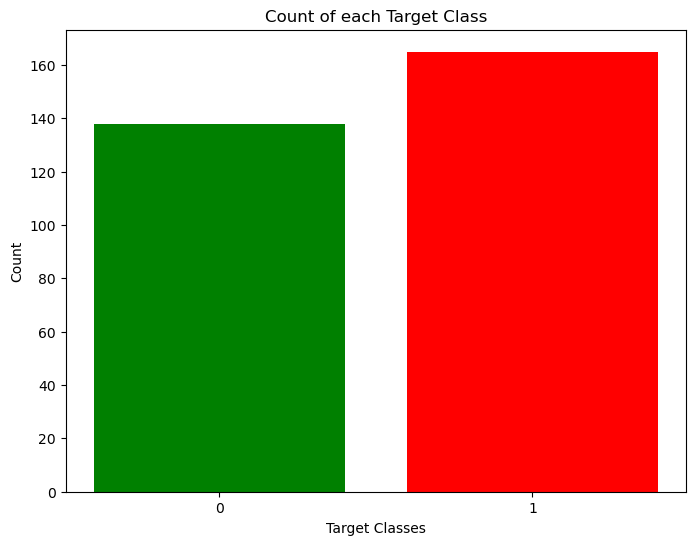

In [10]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

# 2) Machine Learning

In [11]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [12]:
Hyper_paramters={'criterion':['gini', 'entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
 
Tree_Gridsearch_paramters=GridSearchCV(DecisionTreeClassifier(),Hyper_paramters,scoring='roc_auc',n_jobs=-1,cv=10,verbose=1)
 
Tree_crossvalidation=Tree_Gridsearch_paramters.fit(X_train,y_train)
#Tree_crossvalidation=Tree_Gridsearch_paramters.fit(X_train,Ytrain.values.ravel())

print ("The best paramter combination is ")
print(Tree_crossvalidation.best_params_)  #gets best estimator
Final_Model=Tree_crossvalidation.best_estimator_ #gets best estimator

print("The best AUC score was ")
print(Tree_crossvalidation.best_score_)  #gets best score for best estimator # -0.83828599184062269
importances=Tree_crossvalidation.best_estimator_.feature_importances_


 
importances
Names=list(X_train.columns.values)
for f in range(X_train.shape[1]):
    print((Names[f],  importances[[f]]))

Fitting 10 folds for each of 40 candidates, totalling 400 fits
The best paramter combination is 
{'criterion': 'entropy', 'max_depth': 4}
The best AUC score was 
0.8455960705960706
('age', array([0.10269273]))
('sex', array([0.10069057]))
('cp', array([0.30091468]))
('trestbps', array([0.]))
('chol', array([0.02212566]))
('fbs', array([0.]))
('restecg', array([0.05450019]))
('thalach', array([0.08457351]))
('exang', array([0.]))
('oldpeak', array([0.05011152]))
('slope', array([0.]))
('ca', array([0.21600692]))
('thal', array([0.06838423]))


In [13]:
from IPython.display import Image 
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(Final_Model, out_file=None, 
                                feature_names=Names)  

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

InvocationException: GraphViz's executables not found

# 3) test

In [15]:
y_pred = Final_Model.predict(X_test)

from sklearn.metrics import confusion_matrix
 
from sklearn.metrics import classification_report

cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

print(classification_report(y_test, y_pred, target_names=["Heart disease", "No Heart Disears"]))

#Calculate sensitivity and specificity
total1=sum(sum(cm1)) 
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

[[21  6]
 [ 6 28]]
                  precision    recall  f1-score   support

   Heart disease       0.78      0.78      0.78        27
No Heart Disears       0.82      0.82      0.82        34

        accuracy                           0.80        61
       macro avg       0.80      0.80      0.80        61
    weighted avg       0.80      0.80      0.80        61

Accuracy :  0.8032786885245902
Sensitivity :  0.7777777777777778
Specificity :  0.8235294117647058


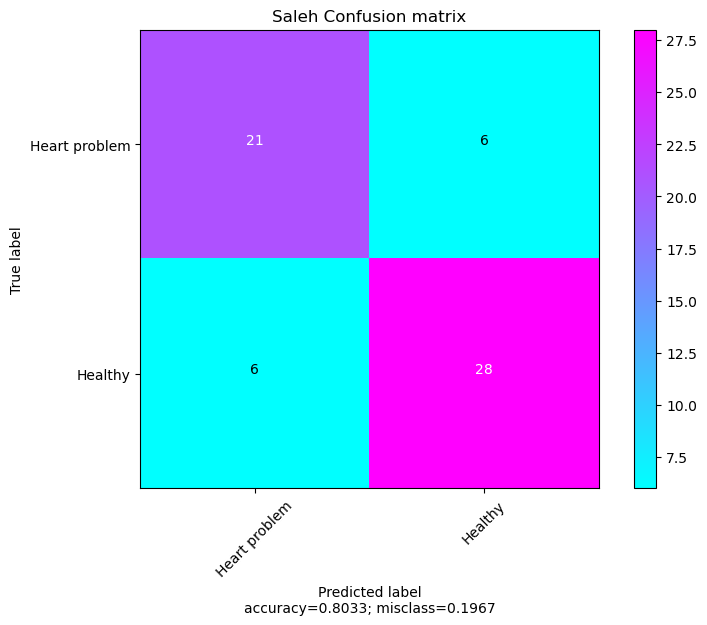

In [16]:
plot_confusion_matrix(cm1,
                          ["Heart problem","Healthy"], # use y_train.unique()  to know order of labels
                          title='Saleh Confusion matrix',
                          cmap=None,
                          normalize=False)

In [17]:
#معرفة الحالة الافتراضية للمخرج وهنا 1 مريض هي الحالة الافتراضية 
y_train.unique()

array([1, 0], dtype=int64)